### SVD

In [1]:
# 랜덤한 4x4 행렬 생성 - row끼리의 의존성 없애기위해
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


svd적용해 U, sigma, Vt도출

In [3]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape) # Sigma는 대각성분만 0이 아니므로 0아닌값만 1차원행렬로
print('U matrix:\n', np.round(U,3))
print('Sigma matrix:\n', np.round(Sigma,3)) 
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma matrix:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [4]:
# Sigma를 다시 0 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))


[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [5]:
# row간 의존성 있을 경우 알기위해 데이터 조작
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [6]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma value:\n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma value:
 [2.663 0.807 0.    0.   ]


sigma 2개값 0 -> 선형독립 row 벡터의 개수 2라는 의미  
행렬의 Rank=2

In [7]:
# Sigma의 0에 대응 하는 U, Sigma, Vt데이터 제외하고 복원
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2,:]
print(U_.shape, Sigma_.shape, Vt_.shape)

a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


* Truncated SVD

In [13]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본행렬
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본행렬\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
# full_matrices: If True (default), U and Vh are of shape (M, M), (N, N). If False, the shapes are (M, K) and (K, N), where K = min(M, N).
print('\n분해행렬차원\n',U.shape, Sigma.shape, Vt.shape)
print('\nSigma행렬\n',Sigma)

# Truncated SVD
num_components=4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated 분해행렬차원\n',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated Sigma행렬\n',Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr)
print('Truncated 복원 행렬\n', matrix_tr)

원본행렬
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해행렬차원
 (6, 6) (6,) (6, 6)

Sigma행렬
 [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated 분해행렬차원
 (6, 4) (4,) (4, 6)

Truncated Sigma행렬
 [0.55463089 0.83865238 0.88116505 3.2535007 ]
Truncated 복원 행렬
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.597

## Scikit Learn SVD클래스 변환

Text(0, 0.5, 'TruncatedSVD Component2')

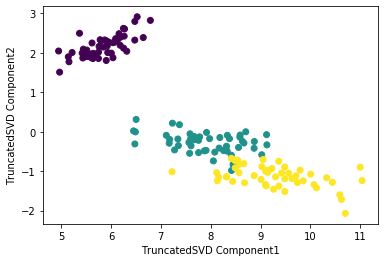

In [14]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component1')
plt.ylabel('TruncatedSVD Component2')

PCA와 TruncatedSVD사실 알고보면 둘다 SVD를 이용해 행렬 분할

스케일링(데이터중심동일해짐) 후 PCA 하면 둘이 거의 유사

Text(0.5, 1.0, 'PCA Transfomed')

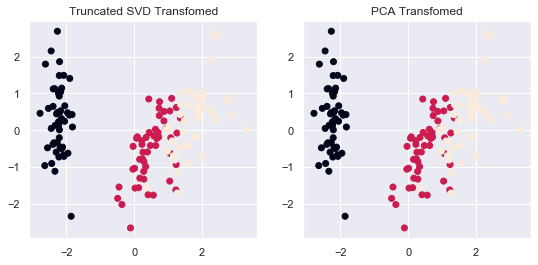

In [18]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

sns.set()

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

#scaling된 data 기반으로 Truncated SVD 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

#scaling된 data 기반으로 PCA 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1, ax2 ) = plt.subplots(figsize=(9,4),ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transfomed')
ax2.set_title('PCA Transfomed')

In [19]:
print('iris_pca - iris_tsvd 평균',(iris_pca-iris_tsvd).mean())
print('pca.components_ - tsvd.components_ 평균',(pca.components_-tsvd.components_ ).mean())

iris_pca - iris_tsvd 평균 2.3375977079946134e-15
pca.components_ - tsvd.components_ 평균 -6.5052130349130266e-18


## NMF

C:\Users\ui88g\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Text(0, 0.5, 'NMF Component2')

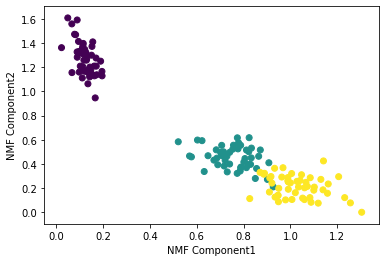

In [2]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component1')
plt.ylabel('NMF Component2')

In [7]:
iris_nmf

array([[0.10703803, 1.32370915],
       [0.1368093 , 1.16981601],
       [0.10323804, 1.20941715],
       [0.14316969, 1.12028074],
       [0.09897292, 1.33139455],
       [0.15313042, 1.3725868 ],
       [0.11379433, 1.20473324],
       [0.12952865, 1.25880308],
       [0.13582786, 1.06315963],
       [0.13995523, 1.18208575],
       [0.11588762, 1.39732542],
       [0.14395416, 1.20158241],
       [0.1275638 , 1.16564037],
       [0.06770194, 1.15585559],
       [0.04992352, 1.60853879],
       [0.08998487, 1.5914358 ],
       [0.08336633, 1.46950818],
       [0.11477577, 1.31138962],
       [0.15647332, 1.41021126],
       [0.11254472, 1.35970097],
       [0.17044174, 1.27632304],
       [0.12683981, 1.32320088],
       [0.02317778, 1.36233527],
       [0.19568902, 1.16569841],
       [0.19627723, 1.12889138],
       [0.1731991 , 1.13785048],
       [0.16244515, 1.20993368],
       [0.12598682, 1.31597397],
       [0.11510315, 1.31602375],
       [0.15556111, 1.13672612],
       [0.